In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
from astroML.crossmatch import crossmatch_angular

/home/astroinfo2023/miniconda3/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Load COSMOS morphology data set

In [3]:
col_names=['SequentialID','RA','DEC','CAPAK_ID','CAPAK_RA','CAPAK_DEC','ACS_MAG_AUTO','ACS_MAGERR_AUTO',
         'ACS_X_IMAGE','ACS_Y_IMAGE','ACS_XPEAK_IMAGE','ACS_YPEAK_IMAGE','ACS_ALPHAPEAK_','ACS_DELTAPEAK_',
         'ACS_A_IMAGE','ACS_B_IMAGE','ACS_THETA_IMAGE','ACS_ELONGATION','ACS_CLASS_STAR','ACS_IDENT',
         'ACS_SE','ACS_MU_CLASS','ACS_OVERLAP','ACS_NEARSTAR','ACS_MASK','ACS_MASKED','ACS_CLEAN',
         'ACS_UNIQUE','GG','M20','CC','AA','R20','R50','R80','RPET','FLAGRPET','FLUX_GIM2D','LE_FLUX_GIM2D',
         'UE_FLUX_GIM2D','R_GIM2D','LE_R_GIM2D','UE_R_GIM2D','ELL_GIM2D','LE_ELL_GIM2D','UE_ELL_GIM2D',
         'PA_GIM2D','LE_PA_GIM2D','UE_PA_GIM2D','DX_GIM2D','LE_DX_GIM2D','UE_DX_GIM2D','DY_GIM2D','LE_DY_GIM2D',
         'UE_DY_GIM2D','SERSIC_N_GIM2D','LE_N_GIM2D','UE_N_GIM2D','R_0P5_GIM2D','CHI_GIM2D','ITER_GIM2D','PC_1',
         'PC_2','PC_3','TYPE','BULG','IRRE','ELLI','STELLARITY','JUNKFLAG','ACSTile']

df_morpho=pd.read_csv('../data/COSMOS-2020/cosmos_morph_zurich_1.0.tbl', delim_whitespace=True, skiprows=4,names=col_names)
df_morpho

,SequentialID,RA,DEC,CAPAK_ID,CAPAK_RA,CAPAK_DEC,ACS_MAG_AUTO,ACS_MAGERR_AUTO,ACS_X_IMAGE,ACS_Y_IMAGE,...,PC_1,PC_2,PC_3,TYPE,BULG,IRRE,ELLI,STELLARITY,JUNKFLAG,ACSTile
0,1.0,150.796234,1.897984,740771.0,150.796219,1.897970,20.372242,0.002666,7004.939941,7171.529785,...,-3.446789,0.027949,0.617810,2.0,0.0,9.0,1.0,0.0,0.0,acs_I_100303+0152_unrot_sci_12.fits
1,2.0,150.794418,1.890546,742119.0,150.794388,1.890544,22.771563,0.008523,6088.169922,7107.479981,...,-0.580690,-3.378245,1.667820,3.0,9.0,9.0,0.0,0.0,0.0,acs_I_100303+0152_unrot_sci_12.fits
2,3.0,150.794632,1.894150,741503.0,150.794586,1.894146,23.056213,0.014826,6518.930176,7060.479981,...,-999999.000000,-999999.000000,-999999.000000,-999999.0,-999999.0,-999999.0,-999999.0,0.0,0.0,acs_I_100303+0152_unrot_sci_12.fits
3,4.0,150.793396,1.886970,742662.0,150.793396,1.886977,23.856871,0.024528,5644.709961,7061.020019,...,0.583980,-1.955296,1.584166,3.0,9.0,9.0,1.0,0.0,0.0,acs_I_100303+0152_unrot_sci_12.fits
4,5.0,150.789520,1.868036,746072.0,150.789490,1.868014,23.984516,0.024132,3326.459961,6987.640137,...,-1.141175,-0.696079,-0.410171,2.0,1.0,9.0,0.0,0.0,0.0,acs_I_100303+0152_unrot_sci_12.fits
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131527,131528.0,149.473496,2.509274,-999999.0,-999999.000000,-999999.000000,23.992823,0.027308,7094.290039,4226.540039,...,-999999.000000,-999999.000000,-999999.000000,-999999.0,-999999.0,-999999.0,-999999.0,0.0,1.0,acs_I_095751+0228_unrot_sci_12.fits
131528,131529.0,149.470200,2.494129,-999999.0,-999999.000000,-999999.000000,23.265909,0.022552,5236.060059,4145.200195,...,-999999.000000,-999999.000000,-999999.000000,-999999.0,-999999.0,-999999.0,-999999.0,0.0,1.0,acs_I_095751+0228_unrot_sci_12.fits
131529,131530.0,149.449844,2.459868,-999999.0,-999999.000000,-999999.000000,23.105940,0.023322,770.030029,2439.389893,...,2.549485,-2.185765,3.936793,9.0,9.0,9.0,0.0,0.0,0.0,acs_I_095751+0228_unrot_sci_12.fits
131530,131531.0,149.443909,2.481606,2505387.0,149.444061,2.481654,23.554340,0.034061,3219.659912,1294.239990,...,3.163826,-3.975575,3.322199,3.0,9.0,9.0,1.0,0.0,0.0,acs_I_095751+0228_unrot_sci_12.fits


## Load COSMOS-2020 Photometry & Physical parameters data set


In [4]:
C20= Table.read('../data/COSMOS-2020/COSMOS2020_CLASSIC_R1_v2.1_p3.fits')
df_C20=C20.to_pandas()
df_C20

,ID,ALPHA_J2000,DELTA_J2000,X_IMAGE,Y_IMAGE,ERRX2_IMAGE,ERRY2_IMAGE,ERRXY_IMAGE,FLUX_RADIUS,KRON_RADIUS,...,ez_ssfr_p025,ez_ssfr_p160,ez_ssfr_p500,ez_ssfr_p840,ez_ssfr_p975,ez_Av_p025,ez_Av_p160,ez_Av_p500,ez_Av_p840,ez_Av_p975
0,1,151.008534,1.398278,1304.953247,2579.132324,0.000009,0.000010,-8.461303e-07,NaN,NaN,...,-1.351244e+01,-1.348066e+01,-1.343223e+01,-1.341693e+01,-1.341693e+01,0.704550,0.809278,0.896577,0.961172,1.070924
1,2,151.028825,1.404349,818.016785,2725.062988,0.000017,0.000017,-8.587199e-07,NaN,NaN,...,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,NaN,NaN,NaN,NaN,NaN
2,3,151.007706,1.398440,1324.814453,2583.007812,0.006722,0.008490,-7.216642e-04,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,150.162372,1.391619,21610.509766,2415.219971,0.031749,0.016943,6.141999e-06,NaN,NaN,...,-9.923774e+00,-9.867739e+00,-9.800538e+00,-9.727689e+00,-9.682667e+00,1.659753,1.739529,1.869392,1.989442,2.089466
4,5,149.540181,1.391537,36540.632812,2414.936523,0.030666,0.016909,3.998309e-03,NaN,NaN,...,-1.124471e+01,-1.095599e+01,-1.008726e+01,-7.962832e+00,-7.962832e+00,0.032678,0.032678,2.129271,3.005573,3.125110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720695,1720696,149.100737,3.071032,47059.863281,42735.585938,0.017312,0.018260,1.413758e-03,NaN,NaN,...,-1.117721e+01,-1.102330e+01,-1.084906e+01,-1.067515e+01,-1.054010e+01,2.278808,2.371111,2.463957,2.532209,2.576138
1720696,1720697,149.073683,3.071523,47708.503906,42747.988281,0.003817,0.213761,-5.326072e-07,NaN,NaN,...,-1.292636e+01,-1.292636e+01,-1.292636e+01,-1.292636e+01,-1.292636e+01,3.846120,3.846120,3.846120,3.846120,3.846120
1720697,1720698,149.084629,3.071534,47446.062500,42748.003906,0.006713,0.133167,3.243966e-07,NaN,NaN,...,-1.241904e+01,-1.241904e+01,-1.241904e+01,-1.232330e+01,-1.225367e+01,1.388419,1.388511,1.388615,1.388615,1.388615
1720698,1720699,149.076520,3.071526,47640.492188,42747.992188,0.003720,0.208227,9.040111e-07,NaN,NaN,...,-1.280756e+01,-1.280756e+01,-1.279108e+01,-1.270157e+01,-1.264756e+01,4.245749,4.246278,4.247021,4.247142,4.247142


## Crossmatch catalogs

In [5]:
max_radius = 1. / 3600  # 1 arcsec
# note, that for the below to work the first 2 columns of the catalogs should be ra, dec
# also, df_1 should be the longer of the 2 catalogs, else there will be index errors
df_1=df_C20[['ALPHA_J2000','DELTA_J2000']]
df_2=df_morpho[['RA','DEC']]
dist, ind = crossmatch_angular(df_1.values, df_2.values, max_radius)
match = ~np.isinf(dist)
# THE DESIRED SOLUTION IS THEN:
df_crossed = df_C20[match]

In [6]:
df_crossed

,ID,ALPHA_J2000,DELTA_J2000,X_IMAGE,Y_IMAGE,ERRX2_IMAGE,ERRY2_IMAGE,ERRXY_IMAGE,FLUX_RADIUS,KRON_RADIUS,...,ez_ssfr_p025,ez_ssfr_p160,ez_ssfr_p500,ez_ssfr_p840,ez_ssfr_p975,ez_Av_p025,ez_Av_p160,ez_Av_p500,ez_Av_p840,ez_Av_p975
170383,170384,149.593785,1.584768,35252.652344,7053.081055,0.000002,0.000003,-1.276794e-06,NaN,NaN,...,-10.221341,-9.952625,-9.774757,-9.652913,-9.574405,0.846592,1.063559,1.211751,1.332235,1.398684
170814,170815,149.593420,1.570536,35261.535156,6711.465332,0.000397,0.000361,7.150339e-05,NaN,NaN,...,-10.600032,-10.527078,-10.362521,-10.156601,-9.979982,0.510040,0.615373,0.715176,0.811628,0.888405
171059,171060,149.592732,1.570213,35278.027344,6703.718750,0.000141,0.000145,-7.744456e-06,NaN,NaN,...,-9.516761,-9.442420,-9.275960,-9.125172,-9.046023,0.475221,0.581212,0.720908,0.833327,0.921857
173034,173035,149.584946,1.572674,35464.839844,6762.842285,0.000223,0.000195,-4.391007e-05,NaN,NaN,...,-9.043368,-8.902051,-8.832085,-8.720423,-8.609680,0.339200,0.474694,0.561246,0.624772,0.696889
173623,173624,150.189733,1.573095,20954.171875,6771.344238,0.000251,0.000215,3.892656e-05,NaN,NaN,...,-13.527081,-13.514615,-11.201537,-10.813020,-10.647240,0.024054,0.044322,0.076273,0.139600,0.222042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548106,1548107,150.080647,2.888815,23570.656250,38350.019531,0.000007,0.000006,-2.070116e-06,NaN,NaN,...,-13.552843,-13.552843,-13.544561,-13.505209,-13.483384,0.380495,0.414504,0.500362,0.699490,0.865416
1548107,1548108,150.082146,2.876807,23534.732422,38061.785156,0.000018,0.000040,-1.139283e-05,NaN,NaN,...,-10.946880,-9.943027,-9.635848,-9.517262,-9.427839,0.842362,1.013871,1.185513,1.361981,1.456294
1548869,1548870,150.062953,2.889004,23994.812500,38354.574219,0.000005,0.000012,-1.211195e-06,NaN,NaN,...,-10.748957,-10.530884,-10.297700,-10.084821,-9.955208,0.087684,0.148069,0.240432,0.509507,0.679499
1550865,1550866,150.059170,2.890513,24085.496094,38390.800781,0.000013,0.000021,3.544543e-06,NaN,NaN,...,-10.427431,-10.275846,-10.168099,-10.133554,-10.109212,0.030401,0.144182,0.223182,0.297361,0.359187


## Check redshift distribution of the COSMOS-2020 galaxies on the COSMOS morphology catalog

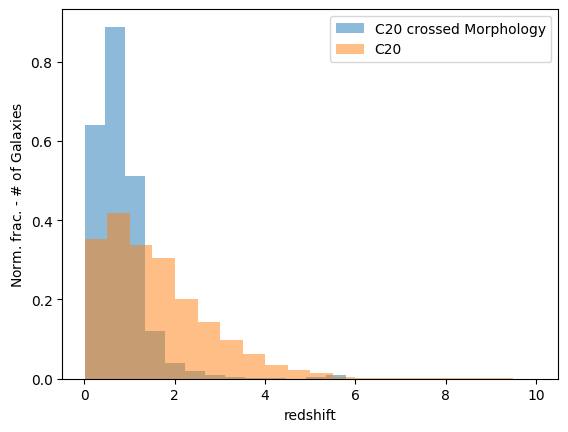

In [8]:
plt.hist(df_crossed['lp_zPDF'],bins=20,alpha=0.5,density=True,label='C20 crossed Morphology')
plt.hist(df_C20['lp_zPDF'],bins=20,alpha=0.5,density=True,label='C20')
plt.xlabel('redshift')
plt.ylabel(r'Norm. frac. - $\#$ of Galaxies')
plt.legend()
plt.show()